<h1 align="center"> TensorFlow Linear Regression </h1>

Basic TensorFlow: Linear Regression  

**if this tutorial doesn't cover what you are looking for, please leave a comment below the youtube video and I will try to cover what you are interested in.**

<h3 align='Left'> Importing Libraries</h3>

In [117]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [118]:
google = web.DataReader('GOOG', data_source = 'google', start = '3/14/2009', end = '4/14/2016')
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-03-16,162.83,164.70,159.14,159.69,NaN
2009-03-17,159.93,167.50,159.39,167.50,NaN
2009-03-18,167.24,169.83,163.86,166.38,NaN
2009-03-19,165.67,167.83,163.53,164.81,NaN
2009-03-20,164.98,166.33,163.01,164.91,NaN


In [119]:
google['ticks'] = np.arange(0,len(google),1.0)
google.head()

,Open,High,Low,Close,Volume,ticks
Date,,,,,,
2009-03-16,162.83,164.70,159.14,159.69,NaN,0.0
2009-03-17,159.93,167.50,159.39,167.50,NaN,1.0
2009-03-18,167.24,169.83,163.86,166.38,NaN,2.0
2009-03-19,165.67,167.83,163.53,164.81,NaN,3.0
2009-03-20,164.98,166.33,163.01,164.91,NaN,4.0


In [136]:
# Parameters
learning_rate = 0.0001
training_epochs = 30
display_step = 1

In [137]:
# Training Data
train_X = google['ticks'].values
train_Y = google['Open'].values
n_samples = train_X.shape[0]

In [138]:
# tf Graph Input
rng = np.random

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable((175.0), name="bias")

In [139]:
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

In [140]:
# Initializing the variables
init = tf.initialize_all_variables()

In [141]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [142]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0001 cost= 3179.257080078 W= 0.320279 b= 175.0
Epoch: 0002 cost= 3179.258300781 W= 0.320279 b= 175.0
Epoch: 0003 cost= 3179.257324219 W= 0.320279 b= 175.0
Epoch: 0004 cost= 3179.256591797 W= 0.320279 b= 175.0
Epoch: 0005 cost= 3179.255859375 W= 0.320279 b= 175.0
Epoch: 0006 cost= 3179.256591797 W= 0.320279 b= 175.0
Epoch: 0007 cost= 3179.258056641 W= 0.320279 b= 175.0
Epoch: 0008 cost= 3179.256835938 W= 0.320279 b= 175.0
Epoch: 0009 cost= 3179.256103516 W= 0.320279 b= 175.0
Epoch: 0010 cost= 3179.254882812 W= 0.320279 b= 175.0
Epoch: 0011 cost= 3179.256103516 W= 0.320279 b= 175.0
Epoch: 0012 cost= 3179.255126953 W= 0.320279 b= 175.0
Epoch: 0013 cost= 3179.254394531 W= 0.320279 b= 175.0
Epoch: 0014 cost= 3179.253417969 W= 0.320279 b= 175.0
Epoch: 0015 cost= 3179.254394531 W= 0.320279 b= 175.0
Epoch: 0016 cost= 3179.253417969 W= 0.320279 b= 175.0
Epoch: 0017 cost= 3179.252685547 W= 0.320279 b= 175.0
Epoch: 0018 cost= 3179.251708984 W= 0.320279 b= 175.0
Epoch: 0019 cost= 3179.25268

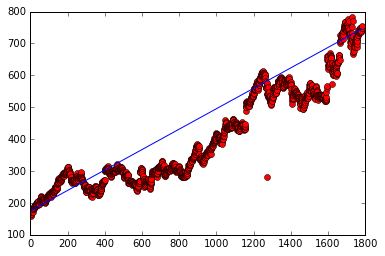

In [143]:


# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch == 1) or ((epoch+1) % display_step == 0):
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.show()

In [ ]:
#### Problem is mean is not 0 and variance is not zero. 
## Need to standardize data